# **Train file**

In [ ]:
import pandas as pd
print("Train dataset:")
a= pd.read_csv('/content/DailyDelhiClimateTrain.csv')
first_5_rows = a.head(5)
print(first_5_rows)

Train dataset:
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [ ]:
print("shape of the train dataset:",a.shape)

shape od the train dataset: (1462, 5)


In [ ]:
print("columns in the dataset:\n",a.columns)

columns in the dataset:
 Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')


In [ ]:
print("datatypes of the datapoints of the columns in the dataset:")
print(a.dtypes)

datatypes of the datapoints of the columns in the dataset:
date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object


In [ ]:
print("null values in the dataset columns wise sum:")
print(a.isnull().sum())

null values in the dataset columns wise sum:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [ ]:
print(a.describe)

<bound method NDFrame.describe of             date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]>


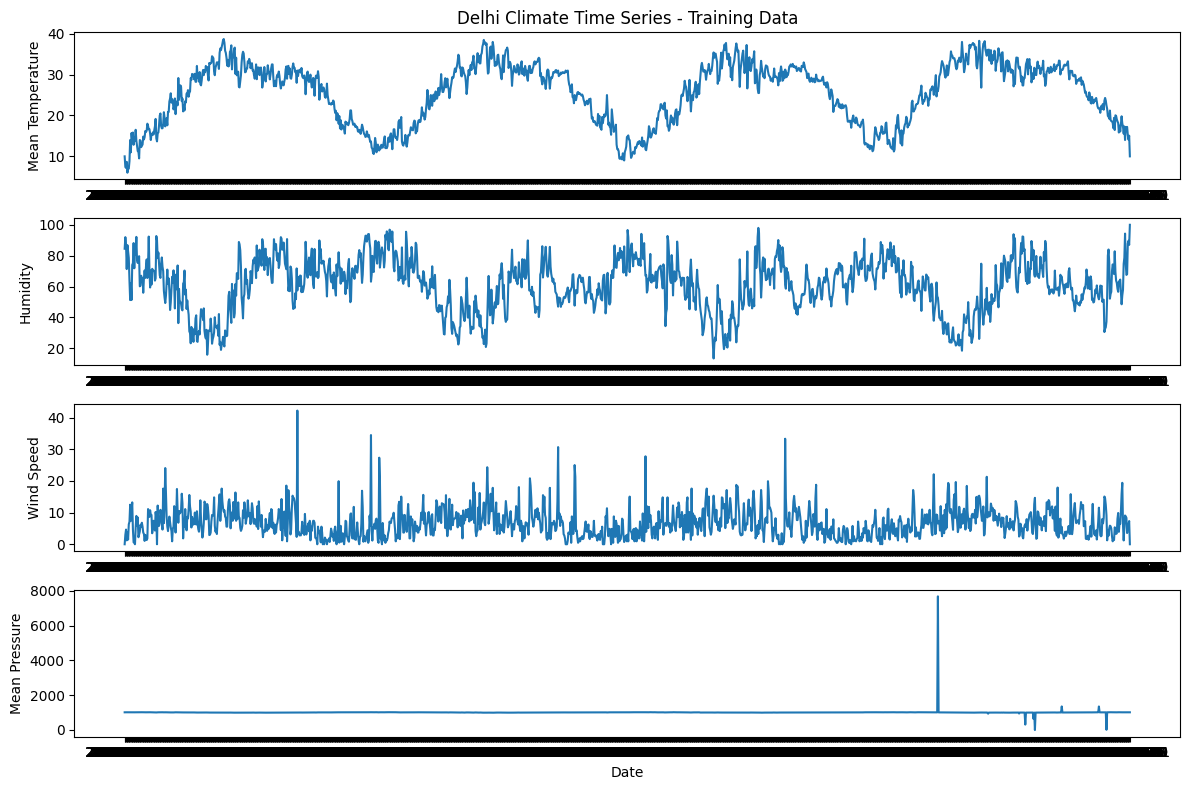

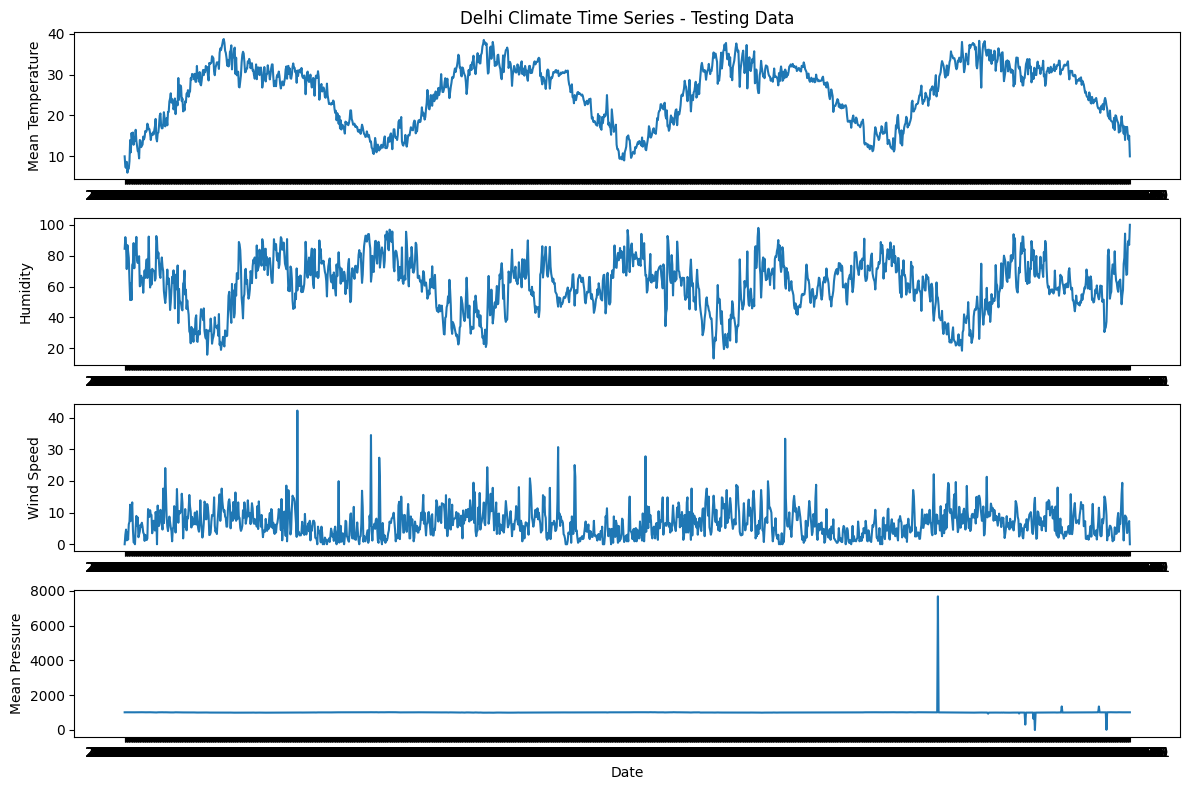

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(a['date'], a['meantemp'])
plt.ylabel('Mean Temperature')
plt.title('Delhi Climate Time Series - Training Data')

plt.subplot(4, 1, 2)
plt.plot(a['date'], a['humidity'])
plt.ylabel('Humidity')

plt.subplot(4, 1, 3)
plt.plot(a['date'], a['wind_speed'])
plt.ylabel('Wind Speed')

plt.subplot(4, 1, 4)
plt.plot(a['date'], a['meanpressure'])
plt.xlabel('Date')
plt.ylabel('Mean Pressure')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(a['date'], a['meantemp'])
plt.ylabel('Mean Temperature')
plt.title('Delhi Climate Time Series - Testing Data')

plt.subplot(4, 1, 2)
plt.plot(a['date'], a['humidity'])
plt.ylabel('Humidity')

plt.subplot(4, 1, 3)
plt.plot(a['date'], a['wind_speed'])
plt.ylabel('Wind Speed')

plt.subplot(4, 1, 4)
plt.plot(a['date'], a['meanpressure'])
plt.xlabel('Date')
plt.ylabel('Mean Pressure')

plt.tight_layout()
plt.show()

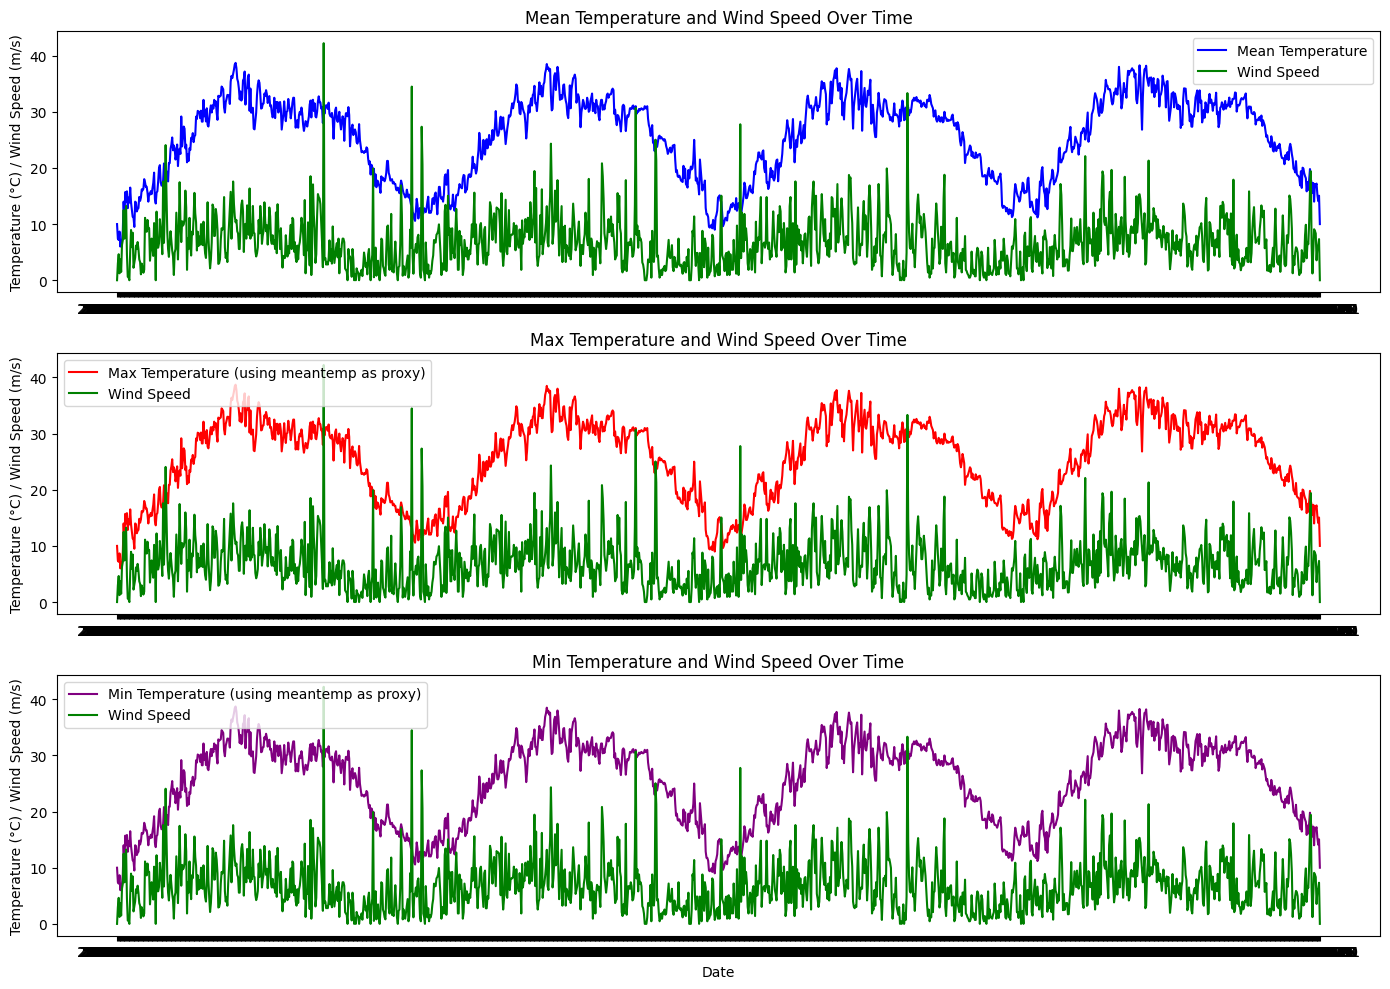

In [23]:

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Mean Temperature vs. Wind Speed
plt.subplot(3, 1, 1)
plt.plot(a['date'], a['meantemp'], label='Mean Temperature', color='blue')
plt.plot(a['date'], a['wind_speed'], label='Wind Speed', color='green')
plt.ylabel('Temperature (°C) / Wind Speed (m/s)')
plt.title('Mean Temperature and Wind Speed Over Time')
plt.legend()

# Max Temperature vs. Wind Speed
plt.subplot(3, 1, 2)

plt.plot(a['date'], a['meantemp'], label='Max Temperature (using meantemp as proxy)', color='red')
plt.plot(a['date'], a['wind_speed'], label='Wind Speed', color='green')
plt.ylabel('Temperature (°C) / Wind Speed (m/s)')
plt.title('Max Temperature and Wind Speed Over Time')
plt.legend()


# Min Temperature vs. Wind Speed
plt.subplot(3, 1, 3)

plt.plot(a['date'], a['meantemp'], label='Min Temperature (using meantemp as proxy)', color='purple')
plt.plot(a['date'], a['wind_speed'], label='Wind Speed', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature (°C) / Wind Speed (m/s)')
plt.title('Min Temperature and Wind Speed Over Time')
plt.legend()

plt.tight_layout()
plt.show()

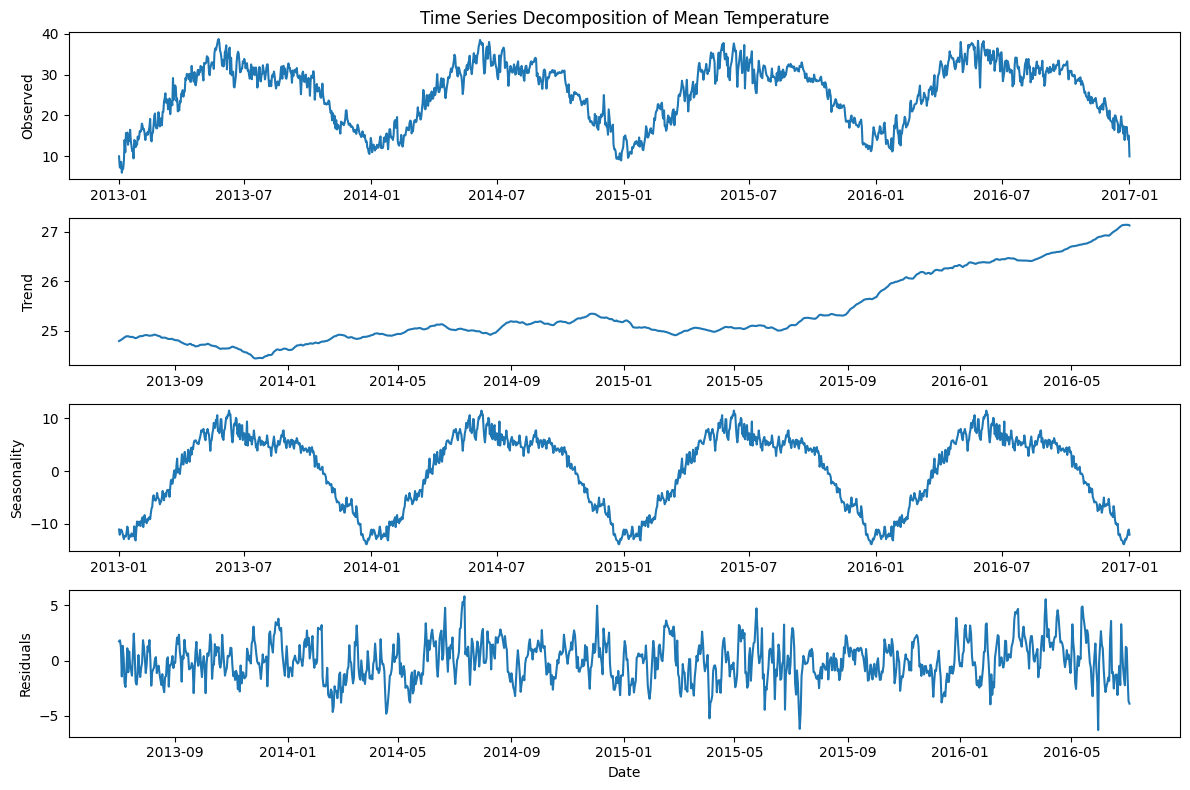

In [30]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
a = a.reset_index()

a['date'] = pd.to_datetime(a['date'])
a = a.set_index('date')

# Decompose the time series
decomposition = seasonal_decompose(a['meantemp'], model='additive', period=365)  # Adjust period as needed

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.ylabel('Observed')
plt.title('Time Series Decomposition of Mean Temperature')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.ylabel('Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.ylabel('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.ylabel('Residuals')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

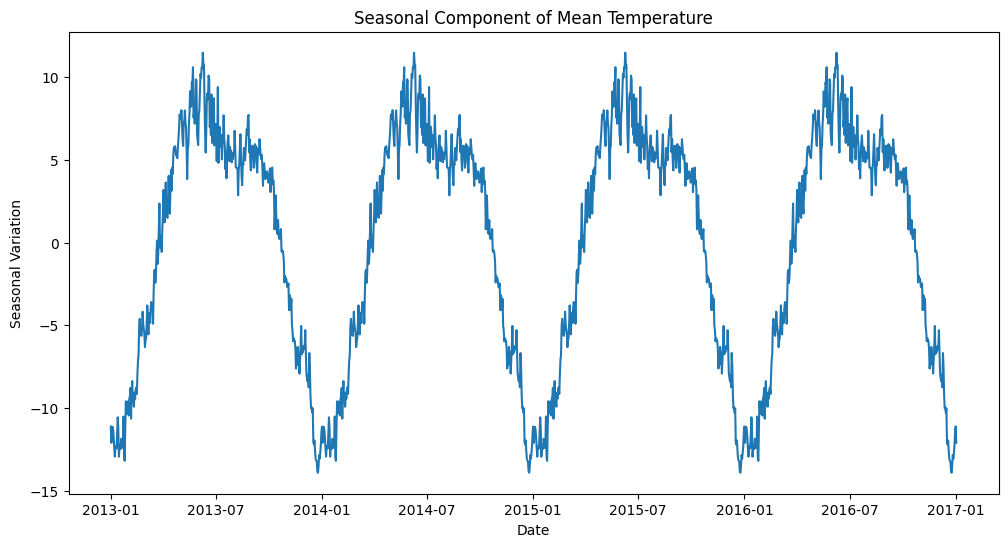

count    1462.000000
mean       -0.015875
std         7.116575
min       -13.909063
25%        -6.300945
50%         2.862091
75%         5.776824
max        11.478642
Name: seasonal, dtype: float64


<Figure size 1200x600 with 0 Axes>

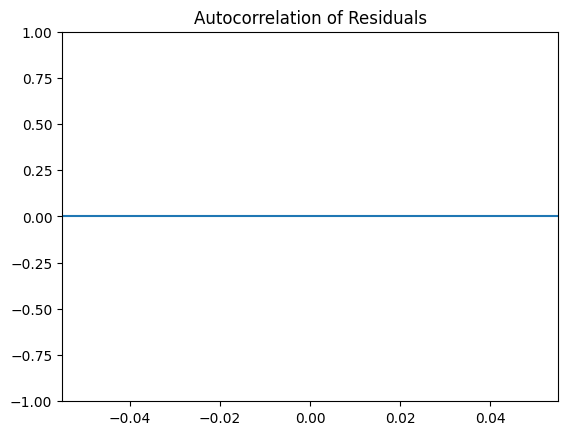

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component of Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Seasonal Variation')
plt.show()

print(decomposition.seasonal.describe())
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,6))
plot_acf(decomposition.resid, lags=30) # Inspect autocorrelation up to 30 lags
plt.title('Autocorrelation of Residuals')
plt.show()

# **Test file**

In [34]:
print("Test dataset:")
b= pd.read_csv('/content/DailyDelhiClimateTest.csv')
first_5_rows = b.head(5)
print(first_5_rows)

Test dataset:
         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [36]:
print("shape of the test dataset:",b.shape)

shape of the test dataset: (114, 5)


In [37]:
print("null values in the dataset columns wise sum:")
print(b.isnull().sum())

null values in the dataset columns wise sum:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [38]:
print(b.describe)

<bound method NDFrame.describe of            date   meantemp   humidity  wind_speed  meanpressure
0    2017-01-01  15.913043  85.869565    2.743478     59.000000
1    2017-01-02  18.500000  77.222222    2.894444   1018.277778
2    2017-01-03  17.111111  81.888889    4.016667   1018.333333
3    2017-01-04  18.700000  70.050000    4.545000   1015.700000
4    2017-01-05  18.388889  74.944444    3.300000   1014.333333
..          ...        ...        ...         ...           ...
109  2017-04-20  34.500000  27.500000    5.562500    998.625000
110  2017-04-21  34.250000  39.375000    6.962500    999.875000
111  2017-04-22  32.900000  40.900000    8.890000   1001.600000
112  2017-04-23  32.875000  27.500000    9.962500   1002.125000
113  2017-04-24  32.000000  27.142857   12.157143   1004.142857

[114 rows x 5 columns]>


In [39]:
target_variable = a['meantemp']

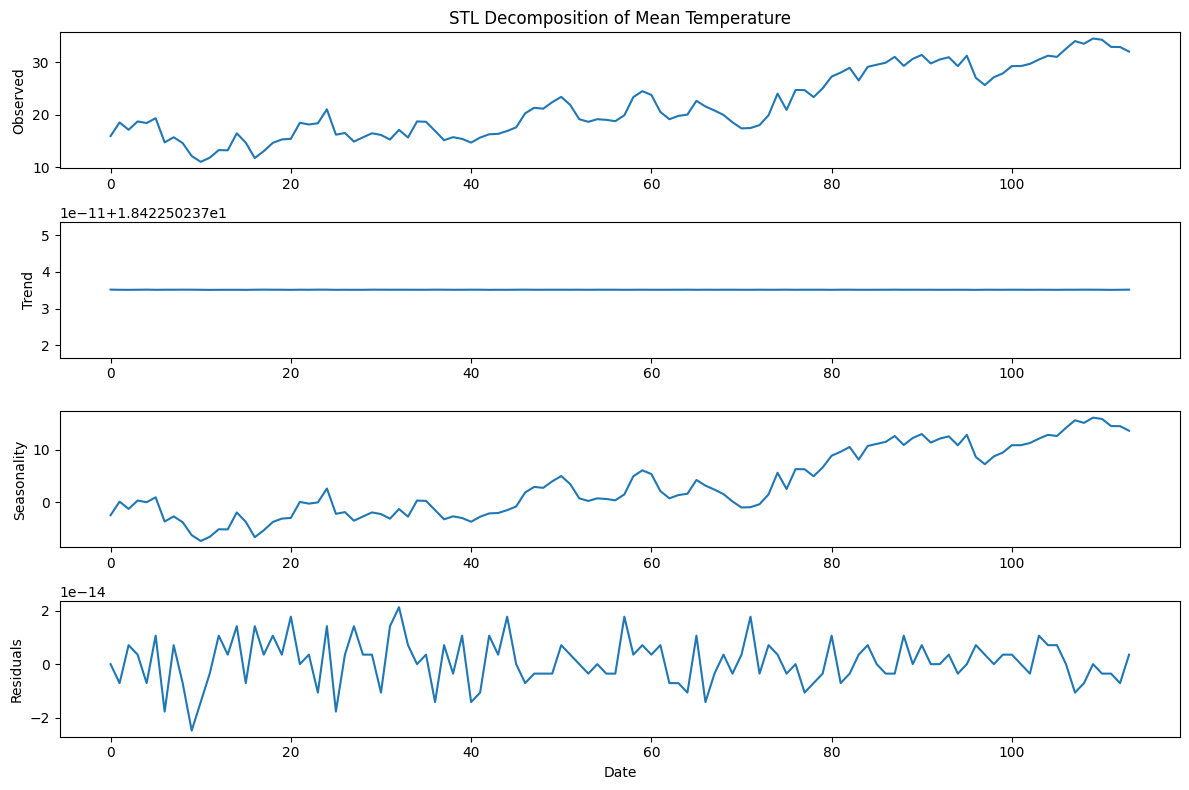

In [42]:
from statsmodels.tsa.seasonal import STL
# Fit the STL model
stl_model = STL(a['meantemp'], period=365, seasonal=13) # Adjust period and seasonal as needed
stl_result = stl_model.fit()

# Access the trend, seasonal, and residual components
trend = stl_result.trend
seasonal = stl_result.seasonal
resid = stl_result.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(stl_result.observed)
plt.ylabel('Observed')
plt.title('STL Decomposition of Mean Temperature')

plt.subplot(4, 1, 2)
plt.plot(trend)
plt.ylabel('Trend')

plt.subplot(4, 1, 3)
plt.plot(seasonal)
plt.ylabel('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(resid)
plt.ylabel('Residuals')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(trend, trend='add', seasonal=None).fit() # Adjust parameters as needed
predicted_values = model.forecast(steps=len(b))


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate evaluation metrics
mse = mean_squared_error(b['meantemp'], predicted_values)
# Calculate RMSE by taking the square root of MSE
rmse = mse**0.5  # or use np.sqrt(mse) if numpy is imported
mae = mean_absolute_error(b['meantemp'], predicted_values)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 50.92357888598805
Root Mean Squared Error (RMSE): 7.136075874455655
Mean Absolute Error (MAE): 5.421439649874444
